<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

C:\Users\harsh\AppData\Local\Temp\ipykernel_5264\4251919625.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_5264\4251919625.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_5264\4251919625.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQI', y='City', data=citywise_aqi.head(10), palette='coolwarm')


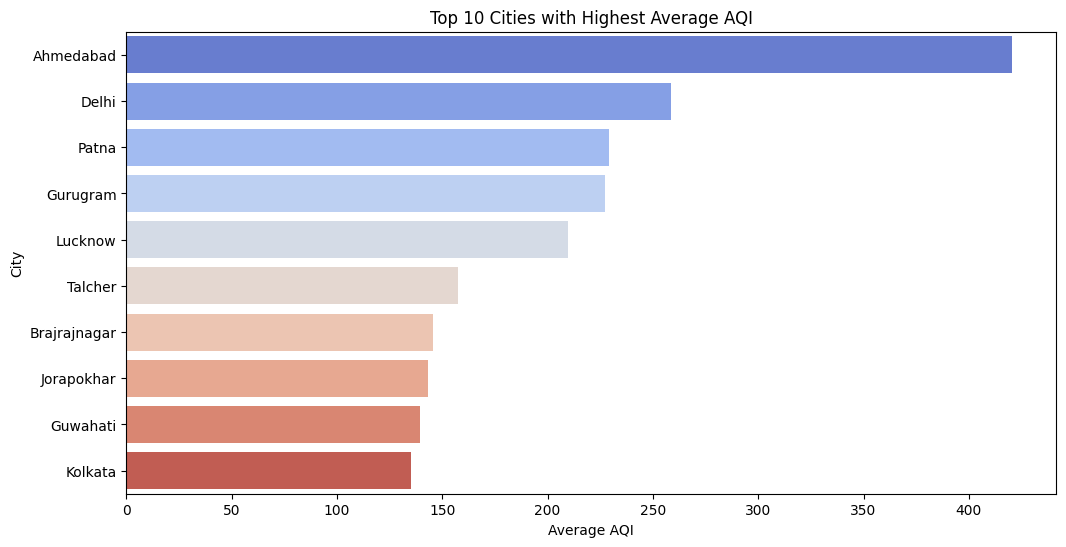

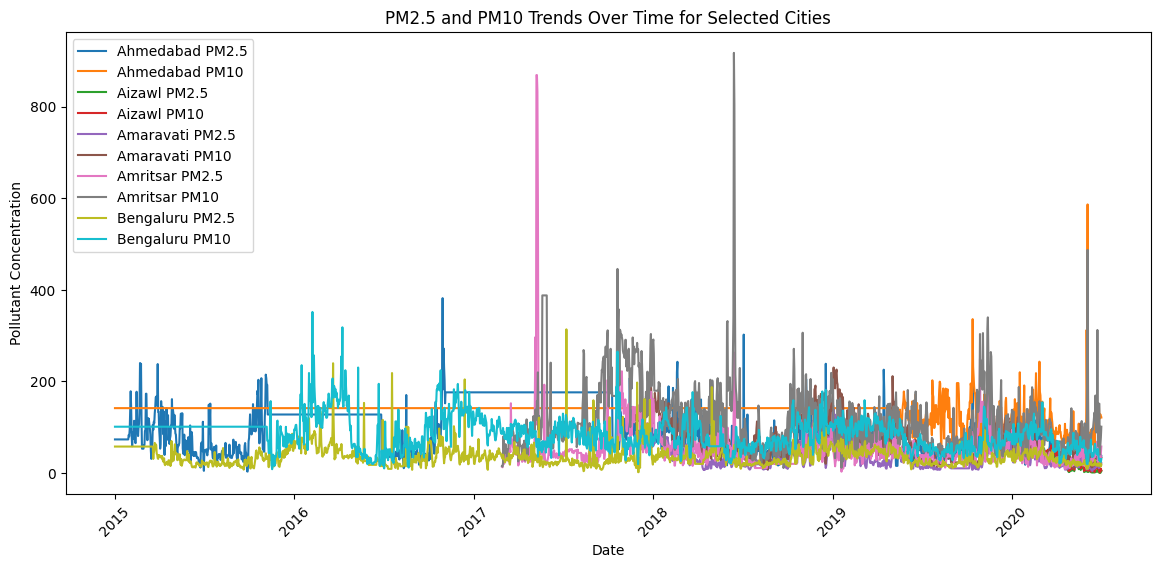

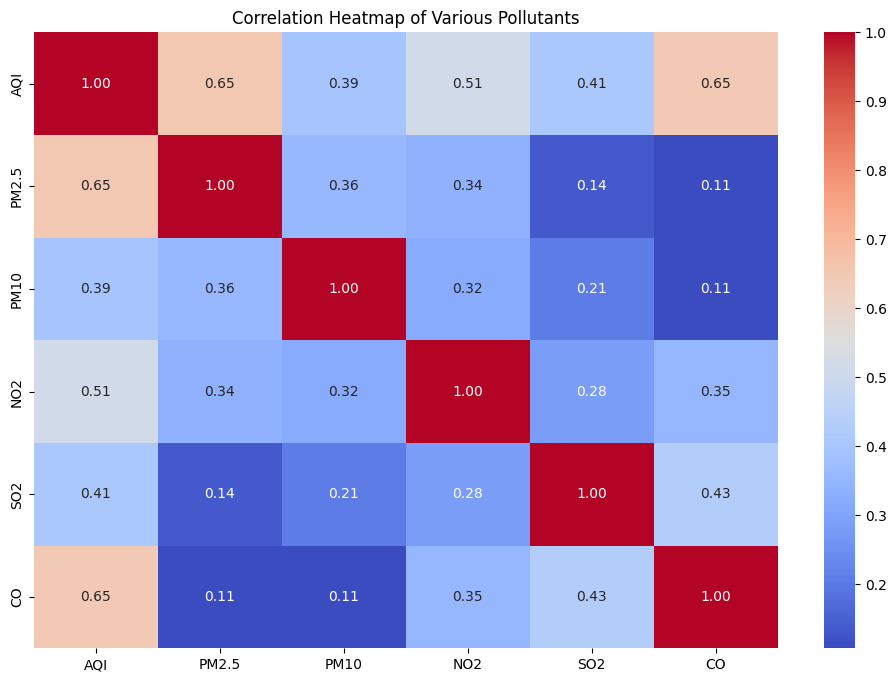

C:\Users\harsh\AppData\Local\Temp\ipykernel_5264\4251919625.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = df.resample('M')['AQI'].mean()


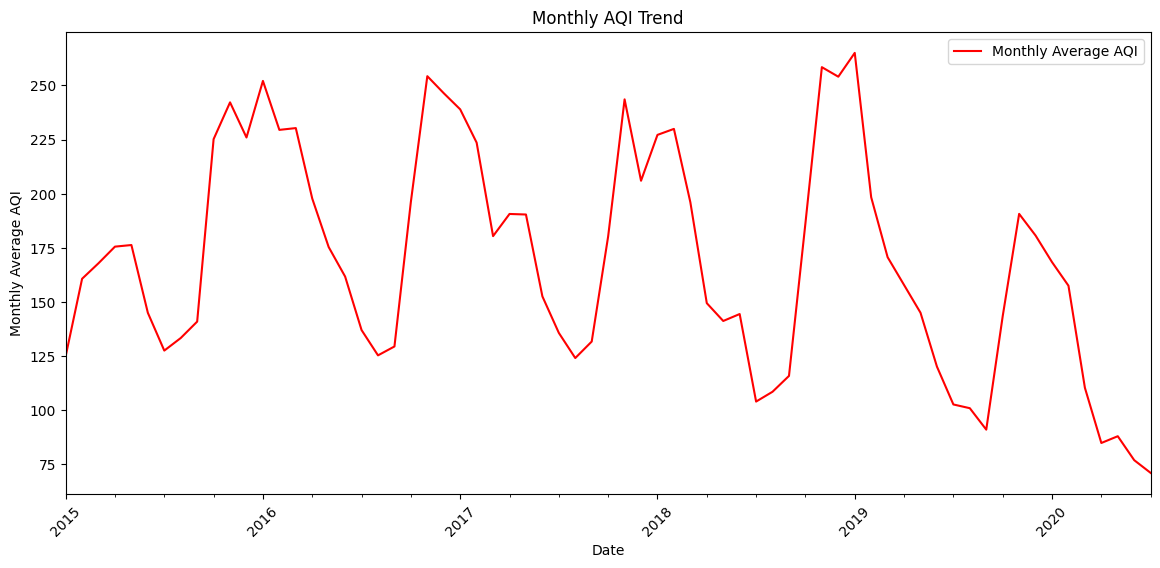

C:\Users\harsh\AppData\Local\Temp\ipykernel_5264\4251919625.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df, palette='viridis')


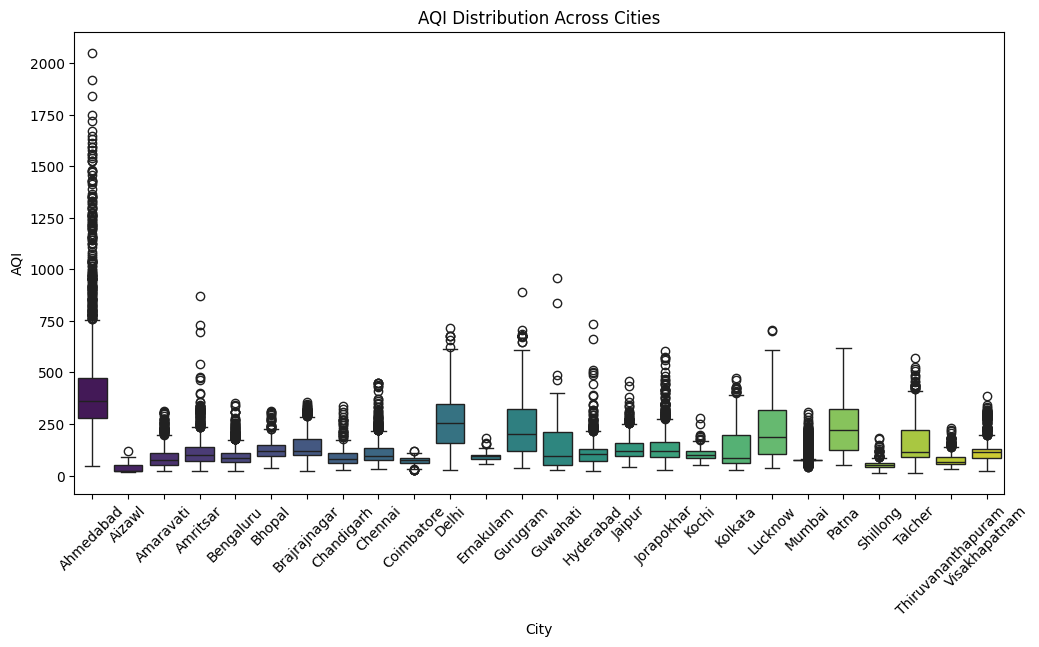

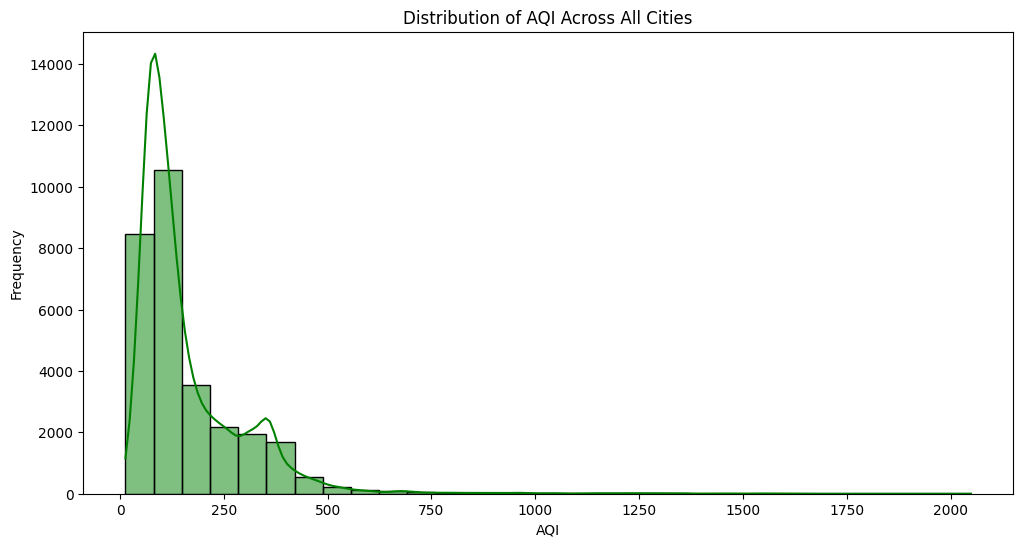

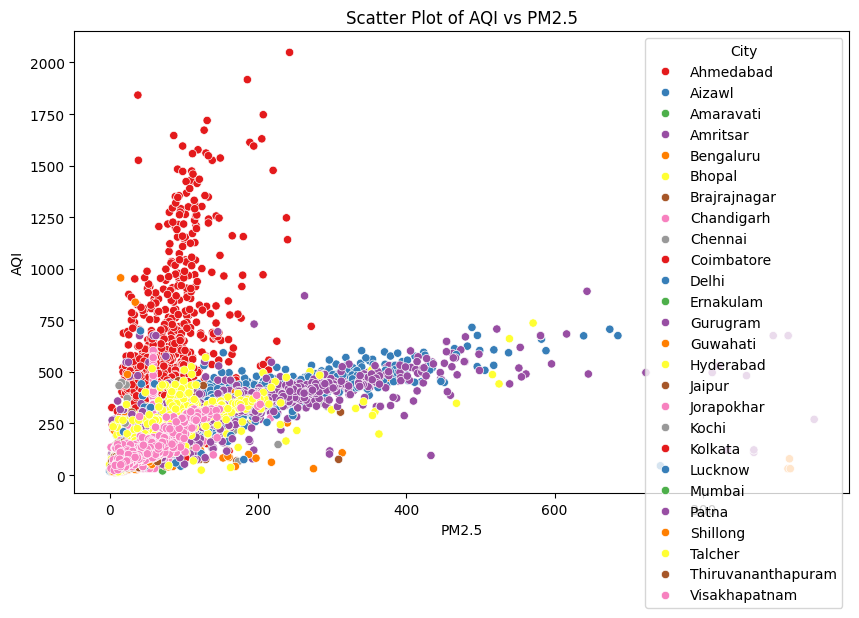

C:\Users\harsh\AppData\Local\Temp\ipykernel_5264\4251919625.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='PM2.5', data=df, palette='coolwarm')


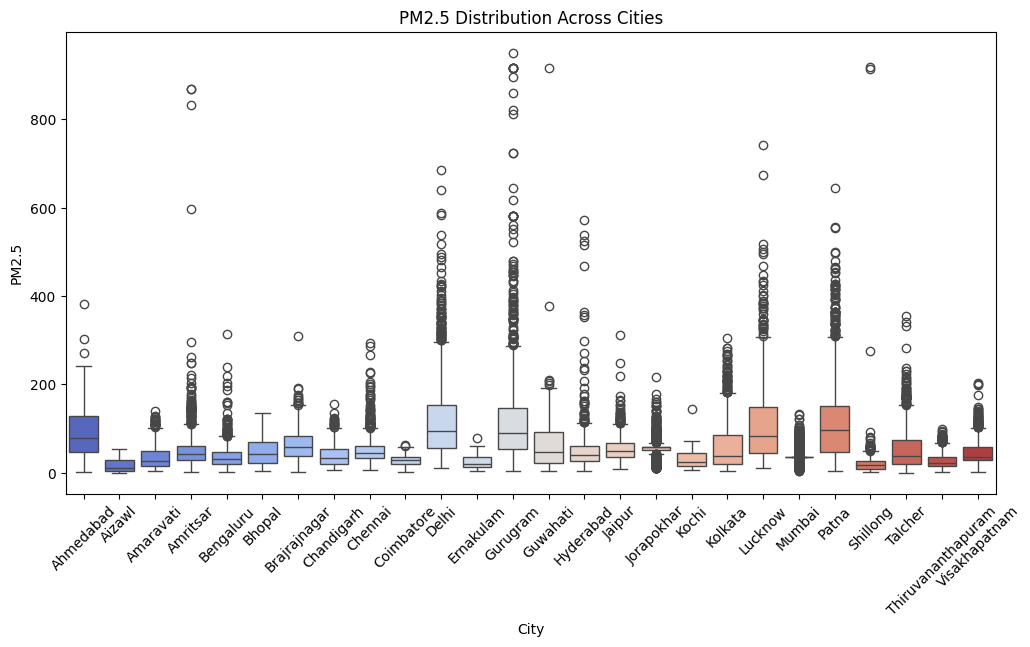

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('city_day.csv', parse_dates=['Date'])
print(df.info())
print(df.head())
print("\nMissing values before filling:\n", df.isnull().sum())

#forward fill, then backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Verifying
print("\nMissing values after filling:\n", df.isnull().sum())

# General Stats
print("\nSummary statistics of the dataset:\n", df.describe())

#  City-wise AQI comparison 
# Average AQI for each city
citywise_aqi = df.groupby('City')['AQI'].mean().reset_index().sort_values(by='AQI', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='AQI', y='City', data=citywise_aqi.head(10), palette='coolwarm')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Average AQI')
plt.show()

# Trend of PM2.5, PM10 over time
plt.figure(figsize=(14, 6))
for city in df['City'].unique()[:5]:
    city_df = df[df['City'] == city].groupby('Date')[['PM2.5', 'PM10']].mean()
    plt.plot(city_df.index, city_df['PM2.5'], label=f'{city} PM2.5')
    plt.plot(city_df.index, city_df['PM10'], label=f'{city} PM10')

plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('PM2.5 and PM10 Trends Over Time for Selected Cities')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# correlations between pollutants
plt.figure(figsize=(12, 8))
sns.heatmap(df[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Various Pollutants')
plt.show()

# Monthly AQI comparison
# Set Date as index and resample for monthly averages
df.set_index('Date', inplace=True)
monthly_aqi = df.resample('M')['AQI'].mean()

plt.figure(figsize=(14, 6))
monthly_aqi.plot(label='Monthly Average AQI', color='r')
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.title('Monthly AQI Trend')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#City-wise boxplot for AQI 
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='AQI', data=df, palette='viridis')
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('AQI Distribution Across Cities')
plt.xticks(rotation=45)
plt.show()

# AQI Distribution (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(df['AQI'], kde=True, bins=30, color='g')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Across All Cities')
plt.show()

#  Scatter Plot of AQI vs PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='AQI', data=df, hue='City', palette='Set1')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs PM2.5')
plt.show()

#  Boxplot for PM2.5 per city 
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='PM2.5', data=df, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('PM2.5')
plt.title('PM2.5 Distribution Across Cities')
plt.xticks(rotation=45)
plt.show()



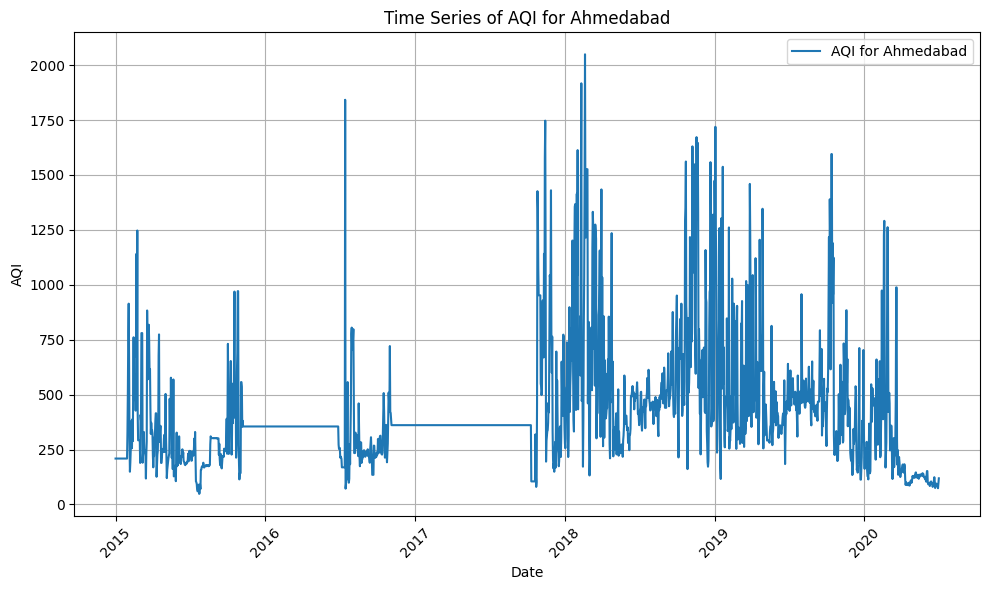

In [5]:

df_reset = df.reset_index()


df_reset['Date'] = pd.to_datetime(df_reset['Date'])


import matplotlib.pyplot as plt

city = 'Ahmedabad' 
city_data = df_reset[df_reset['City'] == city]

plt.figure(figsize=(10, 6))
plt.plot(city_data['Date'], city_data['AQI'], label=f'AQI for {city}')
plt.title(f'Time Series of AQI for {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_28356\1473568456.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = df_reset.resample('M')['AQI'].mean()


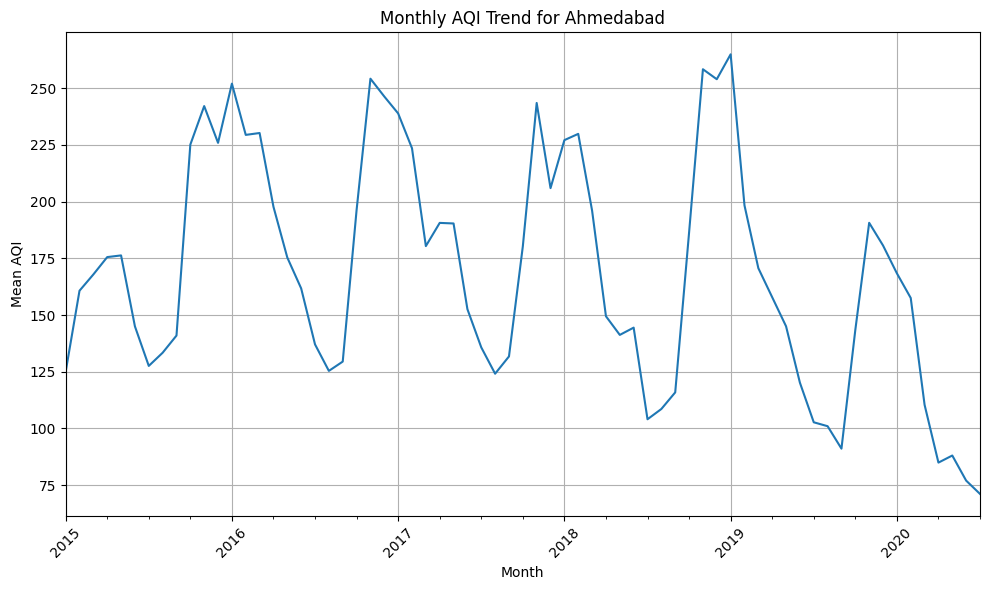

In [6]:

df_reset.set_index('Date', inplace=True)

# Resample by month and calculate mean AQI
monthly_aqi = df_reset.resample('M')['AQI'].mean()

# Plotting 
plt.figure(figsize=(10, 6))
monthly_aqi.plot()
plt.title(f'Monthly AQI Trend for {city}')
plt.xlabel('Month')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_28356\1349092877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df_reset, palette='viridis')


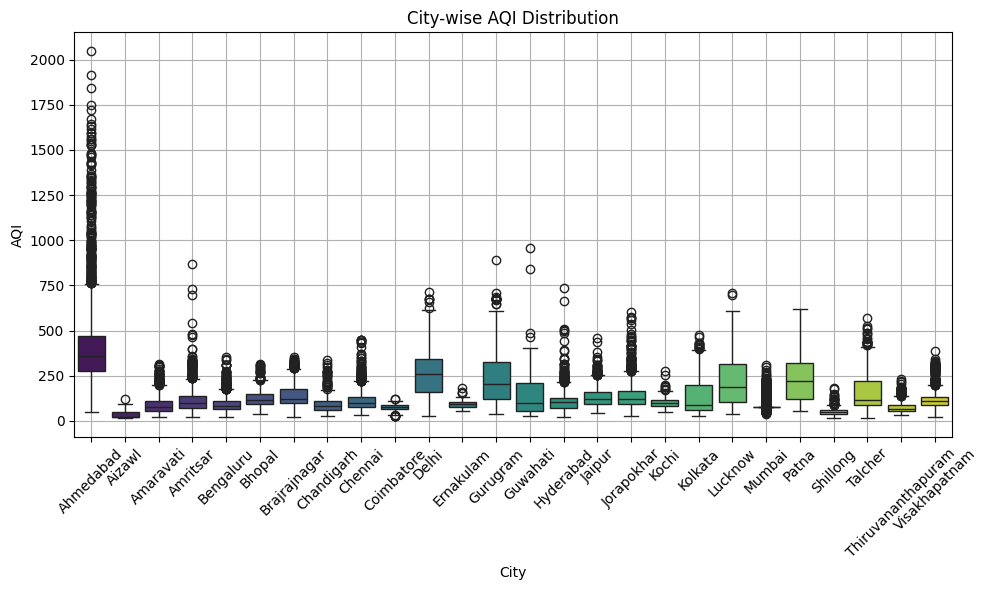

In [7]:
# Box plot to see AQI distribution across cities
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='AQI', data=df_reset, palette='viridis')
plt.title('City-wise AQI Distribution')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
